# 單品牌 Jieba 自動切詞分析（電影）

In [1]:
import pandas as pd

## 資料清理與合併

匯入原始爬蟲資料

In [2]:
KoreaDrama = pd.read_csv("dataset/KoreaDrama_re.csv")

將重複與空白訊息去除

In [3]:
KoreaDrama.drop_duplicates()
KoreaDrama.dropna(inplace=True)

資料欄位整合

In [4]:
KoreaDrama["所有文"] = KoreaDrama["標題"] + KoreaDrama["內容"]

找出符合條件的資料，再資料欄位整合，所有文字變成一個大字串

In [5]:
KoreaDrama_slected = KoreaDrama[KoreaDrama["所有文"].str.contains("成為王的男人")]
theSTR = str(KoreaDrama_slected["所有文"].sum())

資料清理，無意義字元去除

In [6]:
removeword = [
    "span",
    "class",
    "f3",
    "https",
    "imgur",
    "h1",
    "_   blank",
    "href",
    "rel",
    "nofollow",
    "target",
    "cdn",
    "cgi",
    "b4",
    "jpg",
    "hl",
    "b1",
    "f5",
    "f4",
    "goo.gl",
    "f2",
    "email",
    "map",
    "f1",
    "f6",
    "__cf___",
    "data",
    "bbshtml",
    "cf",
    "f0",
    "b2",
    "b3",
    "b5",
    "b6",
    "原文內容",
    "原文連結",
    "作者標題",
    "時間",
    "看板",
    "<",
    ">",
    "，",
    "。",
    "？",
    "—",
    "閒聊",
    "・",
    "/",
    " ",
    "=",
    '"',
    "\n",
    "」",
    "「",
    "！",
    "[",
    "]",
    "：",
    "‧",
    "╦",
    "╔",
    "╗",
    "║",
    "╠",
    "╬",
    "╬",
    ":",
    "╰",
    "╩",
    "╯",
    "╭",
    "╮",
    "│",
    "╪",
    "─",
    "《",
    "》",
    "_",
    ".",
    "、",
    "（",
    "）",
    "　",
    "*",
    "※",
    "~",
    "○",
    "”",
    "“",
    "～",
    "@",
    "＋",
    "\r",
    "▁",
    ")",
    "(",
    "-",
    "═",
    "?",
    ",",
    "!",
    "…",
    "&",
    ";",
    "『",
    "』",
    "#",
    "＝",
    r"\l",
]

In [7]:
for word in removeword:
    theSTR = theSTR.replace(word, "")

## Jieba 自動切詞

In [8]:
import jieba

In [9]:
jieba.set_dictionary("dict/dict.txt.big")
words = jieba.lcut(theSTR, cut_all=False)

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.175 seconds.
Prefix dict has been built successfully.


計算各個詞的數量

In [10]:
words_voice = []
for j in words:
    words_voice.append(words.count(j))

In [11]:
words_voice_df = pd.DataFrame(list(zip(words, words_voice)))
words_voice_df.columns = ["字詞", "聲量"]
words_voice_df = words_voice_df.drop_duplicates(subset="字詞")  # 重複字詞去除

繪圖

In [12]:
import matplotlib.pyplot as plt
import matplotlib_inline

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

<Axes: title={'center': '成為王的男人電影Jieba切詞次數排名'}, xlabel='字詞'>

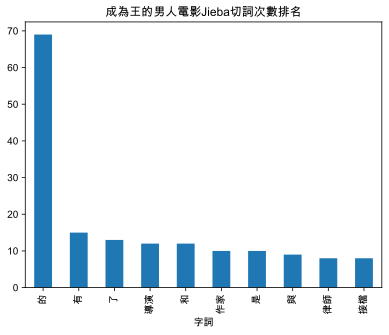

In [13]:
words_voice_df = words_voice_df.set_index("字詞")
words_voice_df["聲量"].sort_values(ascending=False).head(10).plot(
    kind="bar", title="成為王的男人電影Jieba切詞次數排名"
)

## Question: 如何將上述斷詞後的words，去除停用詞再匯圖。

hint: 應用停用詞stopwords.txt, 去除無意義的斷詞字詞

In [14]:
with open("dict/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = (line.strip() for line in f.readlines())

In [15]:
from collections import Counter

words_count = Counter(words)

for stop in stops:
    if stop in words_count:
        del words_count[stop]

print(words_count)

Counter({'導演': 12, '作家': 10, '韓劇': 8, '接檔': 8, '律師': 8, '集': 8, '主演': 8, '講述': 8, '趙': 7, '鄰家': 6, '故事': 6, '執導': 6, '月': 5, '題材': 5, '德浩': 5, '罰': 5, '新': 4, '大家': 4, '罪': 4, '這部': 4, '成為王的男人': 4, '展開': 4, '執筆': 4, '都': 4, '不會': 4, '2019': 3, '多元': 3, '追': 3, '年': 3, '幾部': 3, '月份': 3, '電影': 3, '附身': 3, '32': 3, '打造': 3, '事件': 3, '生活': 3, '16': 3, '朝鮮': 3, '這部劇': 3, '會': 3, '劇照': 3, '明年': 3, '引關': 2, '不曉': 2, '2018': 2, '參考': 2, '拍': 2, '火劇': 2, '信陽': 2, '高賢廷': 2, '善良': 2, '女': 2, '人們': 2, '黑': 2, '騎士': 2, '韓相佑': 2, '最大': 2, '改編': 2, '王': 2, '更': 2, '12': 2, '生': 2, '預計': 2, '一部': 2, '高': 2, '上檔': 2, '電視': 2, '赤月青日': 2, '嚴智苑': 2, '李鍾赫': 2, '崔秉默': 2, '部': 2, 'Netflix': 2, '朱': 2, '智': 2, '勛': 2, '死': 2, '變成': 2, '喪屍': 2, '飾': 2, '一起': 2, '不同': 2, '製': 2, '作': 2, '李鍾碩': 2, '李奈映': 2, '人氣': 2, '多關': 2, '看到': 2, '新劇': 2, '佈': 2, '李瑞鎮': 2, '可能': 2, '圈套': 2, '對抗': 2, '一季': 2, '注轉': 1, '注': 1, '原文': 1, '網址': 1, 'wwwkoreastardailycomtcnews112592aaksdicoma20181228112592690950blankaksdicoma201812

<Axes: title={'center': '成為王的男人電影Jieba切詞次數排名'}, xlabel='字詞'>

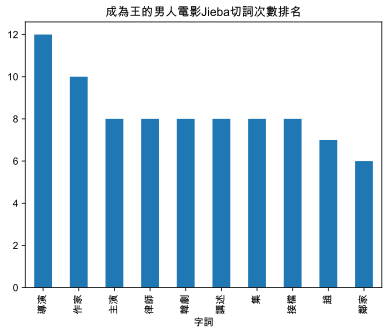

In [16]:
words_voice_df = pd.DataFrame(
    {"字詞": list(words_count.keys()), "聲量": list(words_count.values())}
)
words_voice_df.set_index("字詞", inplace=True)
words_voice_df["聲量"].sort_values(ascending=False).head(10).plot(
    kind="bar", title="成為王的男人電影Jieba切詞次數排名"
)

## Jieba 關鍵詞提取

In [17]:
import jieba.analyse

# 將自己常用的詞加入字典
jieba.set_dictionary("dict/dict.txt.big")
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.169 seconds.
Prefix dict has been built successfully.


In [18]:
keywords_top = jieba.analyse.extract_tags(
    theSTR, topK=10, withWeight=True
)  # 基于TF-IDF算法進行關鍵詞抽取

keywords_top

[('導演', 0.20582096131248206),
 ('韓劇', 0.13721397420832138),
 ('接檔', 0.13721397420832138),
 ('律師', 0.13721397420832138),
 ('講述', 0.13721397420832138),
 ('鄰家', 0.10291048065624103),
 ('執導', 0.10291048065624103),
 ('主演', 0.09603774075466284),
 ('作家', 0.09560428444548062),
 ('題材', 0.08575873388020086)]

In [19]:
keywords_top_DF = pd.DataFrame(keywords_top, columns=["字詞", "聲量"])
keywords_top_DF

,字詞,聲量
0,導演,0.205821
1,韓劇,0.137214
2,接檔,0.137214
3,律師,0.137214
4,講述,0.137214
5,鄰家,0.102910
6,執導,0.102910
7,主演,0.096038
8,作家,0.095604
9,題材,0.085759


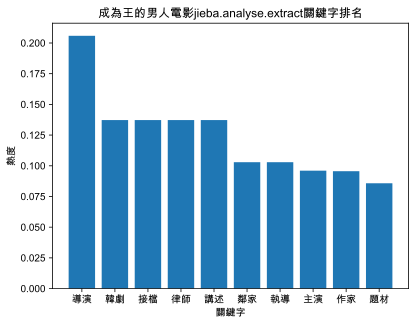

In [20]:
plt.bar(keywords_top_DF["字詞"], keywords_top_DF["聲量"])  # 給予線標籤
plt.xlabel("關鍵字")
plt.ylabel("熱度")
plt.title("成為王的男人電影jieba.analyse.extract關鍵字排名")
plt.show()

## 文字雲關鍵詞提取 - Jieba斷詞並畫文字雲

In [21]:
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
# 將自己常用的詞加入字典
jieba.set_dictionary("dict/dict.txt.big")
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.176 seconds.
Prefix dict has been built successfully.


In [23]:
# 直接用 jieba 斷詞
words = jieba.lcut(theSTR)

In [24]:
# 讀取停用詞
with open("dict/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = (line.strip() for line in f.readlines())

In [25]:
# 對 words 做計數
words_count = Counter(words)

for stop in stops:
    if stop in words_count:
        del words_count[stop]

In [26]:
# 建立文字雲
wordcloud = WordCloud(
    font_path="/System/Library/Fonts/Supplemental/Arial Unicode.ttf",  # 中文字型
    width=800,
    height=600,
    background_color="white",
).generate_from_frequencies(words_count)

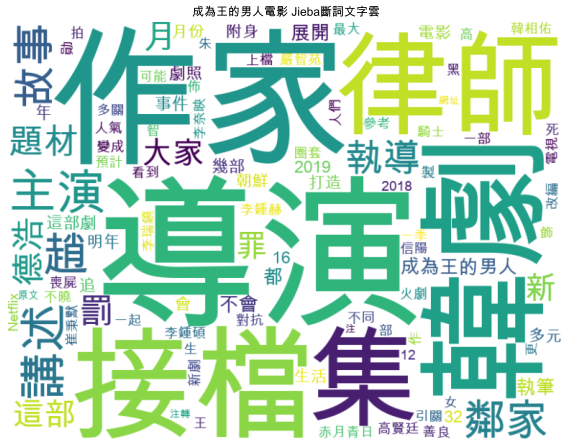

In [27]:
# 畫出文字雲
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("成為王的男人電影 Jieba斷詞文字雲")
plt.show()

比較一下"Jieba關鍵詞提取"與"文字雲關鍵詞提取-Jieba斷詞並畫文字雲"找出來的關鍵詞有何不同: 共同都有導演、韓劇、接檔

## Question: 關鍵字與重要關鍵字擷取

匯入原始爬蟲資料 `PTT_運動內衣_所有資料1000.csv`

1. 請在這個資料集新增 `關鍵字` 和 `重要關鍵字` 二個欄位，將每列所有文資料，利用Jieba 切詞與 `jieba.analyse` 提取重要關鍵詞計算，並填入值至上述二個欄位中
2. 請在這個資料集新增 `關鍵字stopwords` 欄位，將 `關鍵字` 資料，利用停用詞去除沒有意義的字詞

In [28]:
import pandas as pd

ptt_fitness_df = pd.read_csv("dataset/PTT_運動內衣_所有資料1000.csv")
ptt_fitness_df["content"] = ptt_fitness_df["內文"] + ptt_fitness_df["留言"]

In [29]:
import jieba
import jieba.analyse

jieba.set_dictionary("dict/dict.txt.big")
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.190 seconds.
Prefix dict has been built successfully.


### 關鍵字欄位

In [30]:
def extract_keywords(text: str) -> list[str]:
    return jieba.lcut(text)


ptt_fitness_df["關鍵字"] = ptt_fitness_df["content"].apply(extract_keywords)

### 重要關鍵字欄位 (TF_IDF)

In [31]:
def extract_important_keywords(text: str) -> list[str]:
    return [
        keywords
        for keywords, _ in jieba.analyse.extract_tags(text, topK=10, withWeight=True)
    ]


ptt_fitness_df["重要關鍵字"] = ptt_fitness_df["content"].apply(
    extract_important_keywords
)

### 去除停用詞的關鍵字

In [32]:
with open("dict/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = set(line.strip() for line in f.readlines())

print(stops)

{'', '緊接著', '鑑於', '不單', '既', '總之', '哪天', '叮咚', '兒', '喔唷', '各', '吧噠', '離', '自身', '沿', '《', '那裡', '憑藉', '較之', '嘻', '爾', '乃', '如何', '無寧', '如此', '些', '跟', '哎', '再者', '總的說來', '爾後', '由', '著', '除了', '“', '這', '任何', '也罷', '較', '與其', '當著', '人家', '⑥', '它', '論', '這些', '▲', '哪怕', '別的', '可', '咚', '不問', '兩者', '阿', '怎麼樣', '固然', '遵照', '反之', '起', '這邊', '別說', '就是說', '好', '我們', '之類', '②ｃ', '自個兒', '麼', '呃', '5', '您', '反過來說', '各個', '另一方面', '今', '等', '⑩', '漫說', '烏乎', '何時', '不光', '〕', '總而言之', '不惟', '另', '【', '4', '鄙人', '設使', '我', '3', '即便', '③］', '罷了', '所以', '另外', '諸位', '對於', '最', '一方面', '往', '讓', '既然', '至於', '寧肯', '之所以', '倘或', '連', '的', '要', '『', '那個', '則', '一來', '某個', '望', '繼而', '呢', '以及', '縱', '一般', '只', '及', '來', '這就是說', '8', '各自', '即令', '與此同時', '嘩', '若非', '怎', '人', '自家', '各種', '如', '朝', '啪達', '個', '一', '前者', '反過來', '只要', '借', '嗚', '哪邊', '沿著', '隨著', '果然', '此間', '對', '毋寧', '還', '而且', '然則', '開始', '這麼點兒', '即或', '他', '那樣', '只限', '非但', '某', '|', '己', '嘎', '具體地說', '喲', '甚而', '第', '將', '⑧', '已', '嘎登', '多少', '到'

In [33]:
def remove_stopwords(keywords: list[str]) -> list[str]:
    return [
        keyword
        for keyword in keywords
        if keyword not in stops and keyword not in removeword
    ]


ptt_fitness_df["關鍵字stopwords"] = ptt_fitness_df["關鍵字"].apply(remove_stopwords)

## Question: 限縮品牌名稱

匯入原始爬蟲資料 `PTT_運動內衣_所有資料1000.csv`。

1. 請計算 Nike 運動內衣，Jieba 自動切詞前五大關鍵詞次數(請你先用停用詞把不重要的關鍵詞去掉)，print出來。
2. 請計算 Nike 運動內衣，Jieba 關鍵詞提取後前五大關鍵詞次數，print 出來。 

In [34]:
import re
import pandas as pd

pd.options.mode.copy_on_write = True

ptt_fitness_df = pd.read_csv("dataset/PTT_運動內衣_所有資料1000.csv")
ptt_fitness_df["content"] = ptt_fitness_df["內文"] + ptt_fitness_df["留言"]

# 篩出 NIKE 運動內衣資料
nike_df = ptt_fitness_df[
    ptt_fitness_df["content"].str.contains("NIKE|耐克|耐吉", flags=re.IGNORECASE)
]

### 自動切詞前五大關鍵詞次數

In [35]:
extra_remove_words = set(
    ["'", "type", "}", "content", "{", "ipdatetime", "user", "推", "→", "+"]
)

# 純數字內容
pure_number_content = re.compile(r"^\d+$")


def extract_keywords_with_count(text: str) -> list[tuple[str, int]]:
    words = jieba.lcut(text)
    words_count = Counter(words)

    return [
        (keyword, count)
        for keyword, count in words_count.items()
        if keyword not in stops
        and keyword not in removeword
        and keyword not in extra_remove_words
        and not pure_number_content.match(keyword)
    ]

In [36]:
# 自動切詞前五大關鍵詞次數
content = " ".join(nike_df["content"])
keywords_with_count = extract_keywords_with_count(content)
keywords_with_count_df = pd.DataFrame(keywords_with_count, columns=["關鍵字", "次數"])
keywords_with_count_df = keywords_with_count_df.sort_values(
    by="次數", ascending=False
).head(5)
print(keywords_with_count_df)

     關鍵字   次數
382    跑  137
115    都  134
896   謝謝  116
1581   闆  112
1580   老  111


### 關鍵詞提取後前五大關鍵詞次數

In [37]:
stopwords = set(["type", "user", "content", "ipdatetime"])

pure_number_content = re.compile(r"^\d+$")


def extract_tdidf(text: str) -> list[tuple[str, int]]:
    return [
        (keyword, weight)
        for keyword, weight in jieba.analyse.extract_tags(
            text, topK=50, withWeight=True
        )
        if keyword not in stopwords and not pure_number_content.match(keyword)
    ]

In [38]:
content = " ".join(nike_df["content"])
keywords_with_count = extract_tdidf(content)
keywords_with_count_df = pd.DataFrame(keywords_with_count, columns=["關鍵字", "次數"])
keywords_with_count_df = keywords_with_count_df.sort_values(
    by="次數", ascending=False
).head(5)
print(keywords_with_count_df)

     關鍵字        次數
0     謝謝  0.051413
1     感謝  0.037673
2   span  0.037230
3  https  0.034127
4    com  0.030138


## 計算以下運動內衣品牌的前五名關鍵字，並匯圖顯示(每個品牌一張圖，關鍵字次數由大到小排列)。

In [39]:
brands = [
    "Nike",
    "Shock Absorber",
    "adidas",
    "UA",
    "Triumph",
    "Mollifix",
    "Uniqlo",
    "Calvin Klein",
    "UT",
    "AB",
]

In [40]:
import re
import pandas as pd

pd.options.mode.copy_on_write = True

ptt_fitness_df = pd.read_csv("dataset/PTT_運動內衣_所有資料1000.csv")
ptt_fitness_df["content"] = ptt_fitness_df["內文"] + ptt_fitness_df["留言"]

content_of_brand_df = [
    {
        "品牌": brand,
        "內容": " ".join(
            ptt_fitness_df[
                ptt_fitness_df["content"].str.contains(brand, flags=re.IGNORECASE)
            ]["content"]
        ),
    }
    for brand in brands
]

content_of_brand_df = pd.DataFrame(content_of_brand_df)
content_of_brand_df

,品牌,內容
0,Nike,如果連續7天三餐吃\n\n1條地瓜+2顆蛋+1塊肉排+1盤菠菜\n\n這樣身體會發生什麼事\...
1,Shock Absorber,
2,adidas,用來卯足全力打球的鞋\n\n菜單如下\nNike Zoom hyperdunk 2011 e...
3,UA,1.媒體來源:\n\nETtoday新聞雲\n\n2.記者署名\n\n鄺郁庭\n\n3.完整...
4,Triumph,
5,Mollifix,★物品名稱：Inner宅內着。無痕內衣\n輕量運動款-星塵絲墨\n基本款-抹茶綠\n細肩款-...
6,Uniqlo,最近想買保暖的膚色褲襪，因為有些服飾不適合搭黑色褲襪，但又怕膚色的穿起來會很像\n義肢......
7,Calvin Klein,
8,UT,天空上掛著一彎新月，偶爾被雲層遮蔽的晦暗不明。\n\n李維拖著一身疲憊，回到他空蕩蕩的家。\...
9,AB,\n1.媒體來源:\n\n東森 ETtoday\n\n\n2.記者署名\n\n吳靜君\n\n...


In [41]:
extra_remove_words = set(
    ["'", "type", "}", "content", "{", "ipdatetime", "user", "推", "→", "+"]
)

# 純數字內容
pure_number_content = re.compile(r"^\d+$")


def extract_keywords_with_count(text: str) -> list[tuple[str, int]]:
    words = jieba.lcut(text)
    words_count = Counter(words)

    return [
        (keyword, count)
        for keyword, count in words_count.items()
        if keyword not in stops
        and keyword not in removeword
        and keyword not in extra_remove_words
        and not pure_number_content.match(keyword)
    ]

In [42]:
content_of_brand_df["關鍵字"] = content_of_brand_df["內容"].apply(
    extract_keywords_with_count
)
content_of_brand_df

,品牌,內容,關鍵字
0,Nike,如果連續7天三餐吃\n\n1條地瓜+2顆蛋+1塊肉排+1盤菠菜\n\n這樣身體會發生什麼事\...,"[(連續, 3), (天, 2), (三餐, 1), (吃, 24), (條, 2), (地..."
1,Shock Absorber,,[]
2,adidas,用來卯足全力打球的鞋\n\n菜單如下\nNike Zoom hyperdunk 2011 e...,"[(用來, 1), (卯足, 1), (全力, 1), (打球, 2), (鞋, 16), ..."
3,UA,1.媒體來源:\n\nETtoday新聞雲\n\n2.記者署名\n\n鄺郁庭\n\n3.完整...,"[(媒體, 5), (來源, 20), (ETtoday, 1), (新聞, 33), (雲..."
4,Triumph,,[]
5,Mollifix,★物品名稱：Inner宅內着。無痕內衣\n輕量運動款-星塵絲墨\n基本款-抹茶綠\n細肩款-...,"[(★, 2), (物品, 1), (名稱, 2), (Inner, 1), (宅內, 1)..."
6,Uniqlo,最近想買保暖的膚色褲襪，因為有些服飾不適合搭黑色褲襪，但又怕膚色的穿起來會很像\n義肢......,"[(最近, 6), (想買, 5), (保暖, 8), (膚色, 4), (褲襪, 3), ..."
7,Calvin Klein,,[]
8,UT,天空上掛著一彎新月，偶爾被雲層遮蔽的晦暗不明。\n\n李維拖著一身疲憊，回到他空蕩蕩的家。\...,"[(天空, 1), (上掛, 1), (一彎新, 1), (月, 216), (偶爾, 22..."
9,AB,\n1.媒體來源:\n\n東森 ETtoday\n\n\n2.記者署名\n\n吳靜君\n\n...,"[(媒體, 12), (來源, 19), (東森, 1), (ETtoday, 2), (記..."


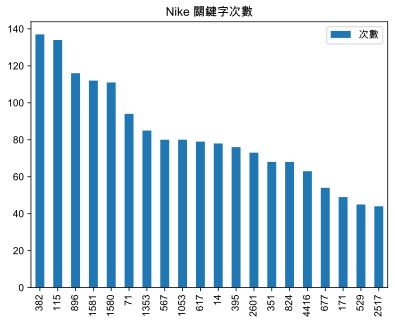

Shock Absorber 沒有關鍵字


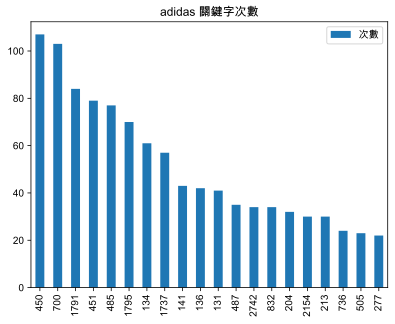

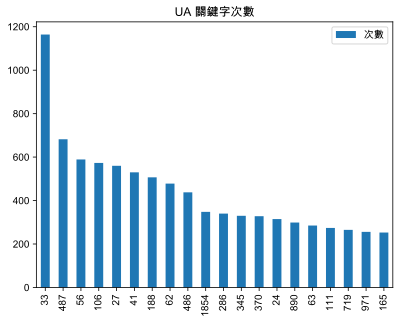

Triumph 沒有關鍵字


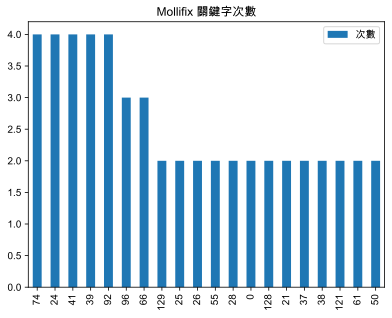

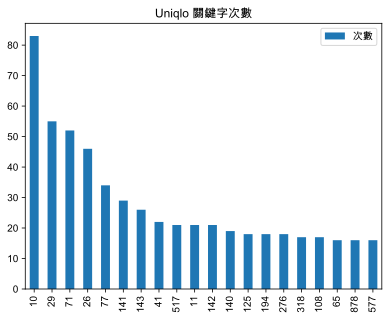

Calvin Klein 沒有關鍵字


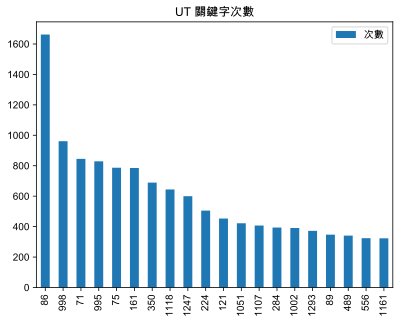

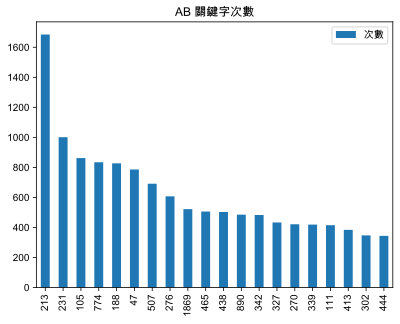

In [43]:
for _, brand_df in content_of_brand_df.iterrows():
    # 如果沒有關鍵字就不要顯示
    if len(brand_df["關鍵字"]) == 0:
        print(f"{brand_df['品牌']} 沒有關鍵字")
        continue

    keywords_of_brand_df = pd.DataFrame(brand_df["關鍵字"], columns=["關鍵字", "次數"])
    keywords_of_brand_df.sort_values(by="次數", ascending=False, inplace=True)
    keywords_of_brand_df.head(20).plot(
        kind="bar", title=f"{brand_df['品牌']} 關鍵字次數"
    )
    plt.show()